** Rice Leaf Disease Prediction Using CNN **




*   Task 1:-Prepare a complete data analysis report on the given data.
*   Task 2:-Create a model which can classify the three major attacking diseases of
rice plants like leaf blast, bacterial blight and brown spot.

*   Task3:- Analyze various techniques like Data Augmentation, etc and create a
report on that.






Domin Analysis :- Rice is a most popular crop. In Agriculture rice is one of most popular plant planted. Durign this rice seed formation farmers facing  challenges the plant is infected form bacteria who destroy the whole plant . To know Farmers which bacteria and viruses are infected in plants which type and treat to leaf thats purpose we doing this project.

In [ ]:
! pip install keras tuning # installing keras  package , kearas is the complete form of tensflow.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: filelock
    Found existing installation: filelock 3.12.2
    Uninstalling filelock-3.12.2:
      Successfully uninstalled filelock-3.12.2
ERROR: pip's dependency resol

In [ ]:
# Importing some basic libraires
import numpy as np # importing numpy for data manupulation
import pandas as pd # importing pandas for dataframe
import seaborn as sns # importing seaborn for visualisation
import matplotlib.pyplot as plt # Imorting plt for data visualisation


In [ ]:
# Giving drive set access permission
from google.colab import drive  # this code search from our goole colab our drive list where our dataset is present.
drive.mount('/content/drive') # Access to our drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras # Keras is complete form of tensflow
import tensorflow as tf # wide range use Tensflow

In [ ]:
# Image dataset uploaing.
data_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/disease dataset') # Image Data loaded from drive


Found 119 files belonging to 3 classes.


NameError: ignored

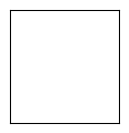

In [ ]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
stopper = EarlyStopping(patience=5)

# Train your model and pass the EarlyStopping callback to the `callbacks` parameter
# history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), callbacks=[stopper])

input_shape_2D=(32,32)
input_shape_3D= (32,32,3)
seed=1
batch_size=32
epochs=30
stopper=EarlyStopping(patience=5)

In [ ]:
#loading image data

data_ds= tf.keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/disease dataset', # location of dataset.
    labels="inferred",#automatically infer the class labels from the subdirectories in the provided directory.
    label_mode="int", # in this dataset 3 disease classes gives in numerical values
    class_names=None, # with resepective class name not show.
    color_mode="rgb", # showing the colur image 'red','Green','Blue'.
    batch_size=None, # the function will return a dataset with batches of one image per batch.
    image_size=input_shape_2D,# represents a 2D tuple like (height, width)
    seed=seed #The seed for shuffling the dataset. If you want to get reproducible results, you can set a fixed seed.
)

Found 119 files belonging to 3 classes.


In [ ]:

# To show how many classes in our dataset
#class labels
class_name=data_ds.class_names
print('In this data classes are :',class_name)

In this data classes are : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [ ]:
def show_images(images, labels):
    fig, axes = plt.subplots(8, 4, figsize=(10, 10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
show_images

<function __main__.show_images(images, labels)>

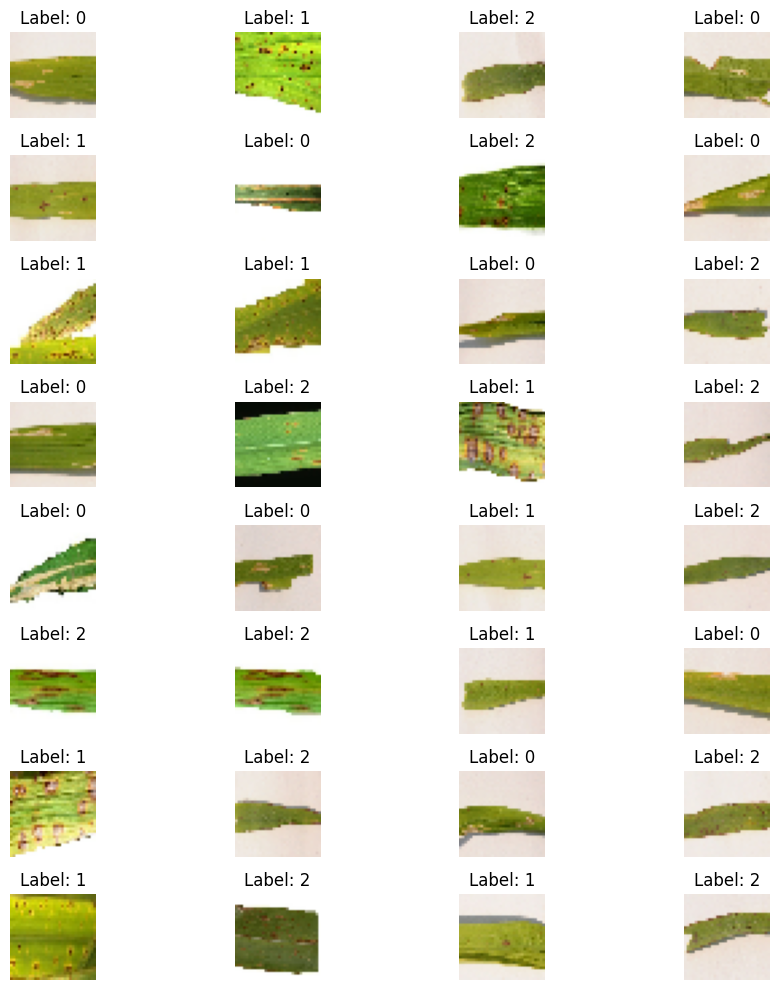

In [ ]:
#displaying image batch of 32
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images, labels = batch

images, labels = next(iter(batched_ds))
show_images(images, labels)

In [ ]:
X=[]
y= []

for image, label in data_ds.batch(119):
  for img, lab in zip(image, label):
    X.append(img)
    y.append(lab.numpy())

In [ ]:
print(X)

[<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 9.671875 , 10.671875 ,  5.671875 ],
        [ 6.       , 11.       ,  5.       ],
        [ 6.       , 11.       ,  5.       ],
        ...,
        [ 6.       , 11.       ,  5.       ],
        [ 6.       , 11.       ,  5.       ],
        [ 6.       , 11.       ,  5.       ]],

       [[11.       , 12.       ,  7.       ],
        [ 6.       , 11.       ,  5.       ],
        [ 6.       , 11.       ,  5.       ],
        ...,
        [ 8.       , 13.       ,  7.       ],
        [ 8.       , 13.       ,  7.       ],
        [ 8.       , 13.       ,  7.       ]],

       [[11.       , 12.       ,  7.       ],
        [ 6.       , 11.       ,  5.       ],
        [ 6.       , 11.       ,  5.       ],
        ...,
        [ 7.9816895, 10.872314 ,  6.1691895],
        [ 8.270264 , 12.598389 ,  2.078125 ],
        [ 9.629639 , 12.625    ,  6.121338 ]],

       ...,

       [[ 8.       , 10.       ,  5.       ],
        [ 6.96

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

In [ ]:
# converting to numpy array
X= np.array(X)
y= np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [ ]:
# converting minmax scaller :-
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [ ]:
print(X_train.shape,'\n', X_test.shape,'\n', y_train.shape,'\n', y_test.shape)

(89, 32, 32, 3) 
 (30, 32, 32, 3) 
 (89,) 
 (30,)


In [ ]:
print(X_train.dtype,'\n', X_test.dtype,'\n', y_train.dtype,'\n', y_test.dtype)

float32 
 float32 
 int32 
 int32


In [ ]:
# (89, 224, 224, 3)  reffers to 89 images and 243,243 is 2d data set pixsel, and 3 reffers to red,greed, blue.

In [ ]:
y_test # converted into classes

array([0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 2], dtype=int32)

In [ ]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_test # converted one hot encodeing created 3 classs 3 diff rows of columns.

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# break training set into training and validation sets
(X_train, X_valid) = X_train[9:], X_train[:9]
(y_train, y_valid) = y_train[9:], y_train[:9]

In [ ]:
# print shape of training set
print(X_train.shape,'\n', X_test.shape,'\n', y_train.shape,'\n', y_test.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

(80, 32, 32, 3) 
 (30, 32, 32, 3) 
 (80, 3) 
 (30, 3)
80 train samples
30 test samples
9 validation samples



Define the Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # the arechetecture of cnn
# conv2d :- reffers to the convolution layer data pixel converts into the matrix format
# maxpooling layer:- reduce the spatial dimensions of feature maps, while retaining the most important information
# min intensity=min vaues and high internsity :- takes high values. for better result always applay maxPolling

# droupout :- Decrease the overfitting and deactivate some nuarons.
# flatering:-2D array or a 3D tensor is converted into a 1D vector. reduce the spiual size of feature map.
# Dense :- in image processing conv and pooling layer giving numbers matrix form this non zero valuse known as dense and zero values known as sarse
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.summary() # showing the data report

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 4, 4, 64)        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
#training model
checkpointer_own = ModelCheckpoint(filepath='own_model.weights.best.hdf5', verbose=3, save_best_only=True)

history=model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100, callbacks=[checkpointer_own, stopper])

Epoch 1/100
2/3 [===================>..........] - ETA: 0s - loss: 0.2510 - accuracy: 0.9688
Epoch 1: val_loss improved from inf to 0.70245, saving model to own_model.weights.best.hdf5
3/3 [==============================] - 0s 145ms/step - loss: 0.2320 - accuracy: 0.9625 - val_loss: 0.7024 - val_accuracy: 0.8333
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 0.0865 - accuracy: 0.9750
Epoch 2: val_loss improved from 0.70245 to 0.49112, saving model to own_model.weights.best.hdf5
3/3 [==============================] - 0s 145ms/step - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.4911 - val_accuracy: 0.8333
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.49112
3/3 [==============================] - 0s 107ms/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.5587 - val_accuracy: 0.8333
Epoch 4/100
2/3 [===================>..........] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000
Epoch 

In [ ]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=100,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer],
          verbose=3, shuffle=True)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.05751, saving model to model.weights.best.hdf5
Epoch 2/100

Epoch 2: val_loss did not improve from 0.05751
Epoch 3/100

Epoch 3: val_loss did not improve from 0.05751
Epoch 4/100

Epoch 4: val_loss did not improve from 0.05751
Epoch 5/100

Epoch 5: val_loss did not improve from 0.05751
Epoch 6/100

Epoch 6: val_loss did not improve from 0.05751
Epoch 7/100

Epoch 7: val_loss did not improve from 0.05751
Epoch 8/100

Epoch 8: val_loss did not improve from 0.05751
Epoch 9/100

Epoch 9: val_loss did not improve from 0.05751
Epoch 10/100

Epoch 10: val_loss did not improve from 0.05751
Epoch 11/100

Epoch 11: val_loss did not improve from 0.05751
Epoch 12/100

Epoch 12: val_loss did not improve from 0.05751
Epoch 13/100

Epoch 13: val_loss improved from 0.05751 to 0.05596, saving model to model.weights.best.hdf5
Epoch 14/100

Epoch 14: val_loss did not improve from 0.05596
Epoch 15/100

Epoch 15: val_loss did not improve from 0.05596
Ep

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.6667%
